# Sex analysis

In [24]:
# Importing all relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [25]:
# Reading the CSV file into a DataFrame, also placing the right file path
df = pd.read_csv(r'C:\Users\alvarocairo\Insurance.csv')

# Display the first few rows from the DataFrame
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,1,southwest,16884.92
1,18,male,33.8,1,0,southeast,1725.55
2,28,male,33.0,3,0,southeast,4449.46
3,33,male,22.7,0,0,northwest,21984.47
4,32,male,28.9,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,0,northwest,10600.55
1334,18,female,31.9,0,0,northeast,2205.98
1335,18,female,36.9,0,0,southeast,1629.83
1336,21,female,25.8,0,0,southwest,2007.95


#### Data exploration
##### Checking balance in observations for the samples to ensure the validity for the statistical testsing.

In [26]:
# Count the occurrences of 'male' and 'female' in the 'sex' column
sex_counts = df['sex'].value_counts()

# Display the counts
print(sex_counts)

sex
male      676
female    662
Name: count, dtype: int64


##### Comparing means to check whether the average values differ significantly between the groups. 
- A significant difference in means could suggest a difference in central tendency.

In [27]:
# Group the data by 'sex' and calculate the mean 'expenses' for each group
grouped = df.groupby('sex')['expenses'].mean()

# Calculate the mean difference
mean_difference = grouped['male'] - grouped['female']

# Print the results
print("Mean expenses for males:", grouped['male'])
print("Mean expenses for females:", grouped['female'])
print("Mean difference between males and females:", mean_difference)

Mean expenses for males: 13956.751420118344
Mean expenses for females: 12569.578897280968
Mean difference between males and females: 1387.1725228373762


##### Visualization using a histogram.

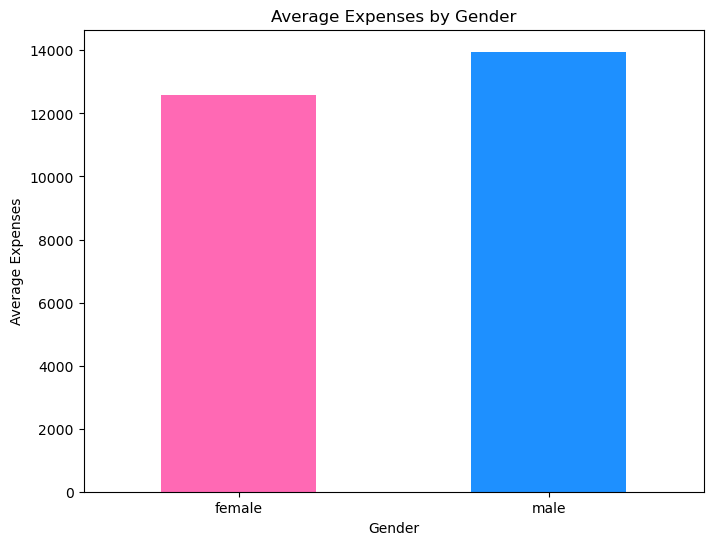

In [42]:
# Define colors for 'male' and 'female' bars
colors = ['hotpink', 'dodgerblue']

# Create a bar chart to display the mean expenses
grouped.plot(kind='bar', figsize=(8, 6), color=colors)
plt.xlabel('Gender')
plt.ylabel('Average Expenses')
plt.title('Average Expenses by Gender')
plt.xticks(rotation=0)
plt.show()

##### Comparing medians to assess whether the typical value in one group differs from the typical value in the other group. 
- This is particularly useful when dealing with skewed or non-normally distributed data.

In [40]:
# Calculate the median expenses for 'male' and 'female' groups
male_median = df[df['sex'] == 'male']['expenses'].median()
female_median = df[df['sex'] == 'female']['expenses'].median()

# Print the medians
print("Median expenses for males:", male_median)
print("Median expenses for females:", female_median)

Median expenses for males: 9369.615
Median expenses for females: 9412.965


##### Gaining insights into the distribution of expenses by gender.

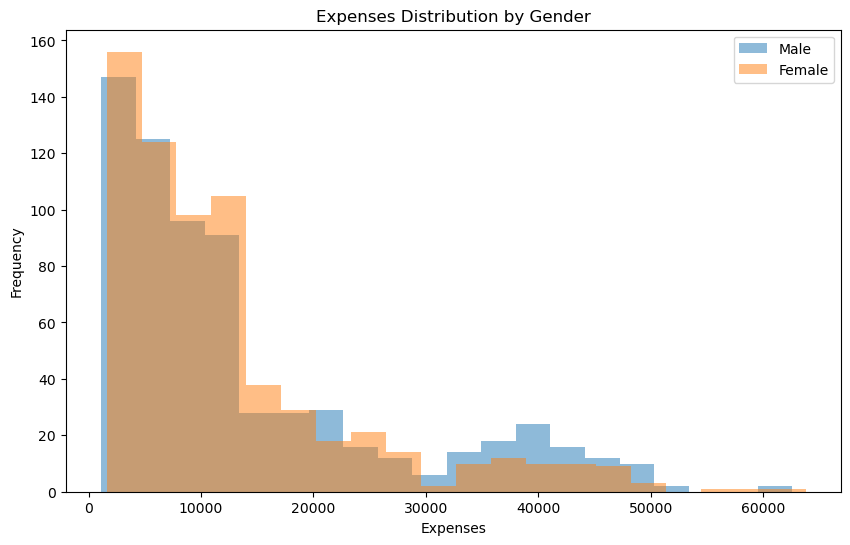

In [29]:
# Group the data by 'sex' and get the 'expenses' column
male_expenses = df[df['sex'] == 'male']['expenses']
female_expenses = df[df['sex'] == 'female']['expenses']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(male_expenses, bins=20, alpha=0.5, label='Male')
plt.hist(female_expenses, bins=20, alpha=0.5, label='Female')
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.title('Expenses Distribution by Gender')
plt.legend(loc='upper right')
plt.show()

##### Using a heatmap to explore how insurance expenses are distributed by sex and region.
- Also to gain a better understanding of the relationships within the dataset.

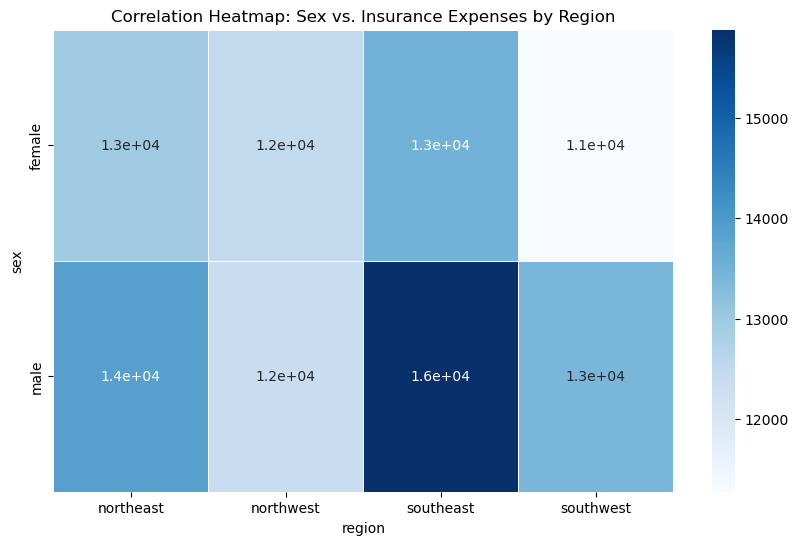

In [31]:
# Create a pivot table to reshape the data for the heatmap
pivot_data = df.pivot_table(index='sex', columns='region', values='expenses')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, cmap='Blues', linewidths=.5)
plt.title('Correlation Heatmap: Sex vs. Insurance Expenses by Region')
plt.show()

# Sub-question 3: Does sex relate to differences in insurance expenses?
- H0: The difference in gender does not affect insurance expenses (μ1 = μ2).
- Ha: The difference in gender affects the insurance costs (μ1 ≠ μ2).

### Indepent Samples T-Test

In [32]:
# Assumptions for Independent Samples T-Test

# 1. Independence Assumption:
# The observations in the 'male' and 'female' groups are independent of each other.

# 2. Random Sample Assumption:
# The data is collected through a random sampling method to ensure that it represents the larger population from which it is drawn.


In [33]:
# 3. Normality Assumption:
# Check the normality of data distribution for both 'male' and 'female' groups.

# Shapiro-Wilk test for normality
shapiro_statistic_male, shapiro_p_male = stats.shapiro(male_data)
shapiro_statistic_female, shapiro_p_female = stats.shapiro(female_data)

print(f"Shapiro-Wilk test for 'male' group: Statistic={shapiro_statistic_male}, p-value={shapiro_p_male}")
print(f"Shapiro-Wilk test for 'female' group: Statistic={shapiro_statistic_female}, p-value={shapiro_p_female}")

Shapiro-Wilk test for 'male' group: Statistic=0.8228137493133545, p-value=1.1787909988118692e-26
Shapiro-Wilk test for 'female' group: Statistic=0.8053944110870361, p-value=1.8305655972609575e-27


- The closer the Shapiro-Wilk test statistic is to 1, the more the data resembles a normal distribution. In both cases, the test statistics are less than 1, which suggests that the data in both groups deviates from a perfect normal distribution.

- The p-value is a measure of the evidence against the null hypothesis. In this case, the null hypothesis is that the data in each group follows a normal distribution. 
- For both the 'male' and 'female' group, the extremely low p-value (close to zero) indicates strong evidence against the assumption that the data follows a normal distribution.

In [34]:
# 4. Homogeneity of Variance : 
# The variances of the two groups being compared should be approximately equal.

# Levene's test for homogeneity of variances
levene_statistic, levene_p = stats.levene(male_data, female_data)

print(f"Levene's test: Statistic={levene_statistic}, p-value={levene_p}")

# Check the p-value to assess homogeneity of variances

Levene's test: Statistic=9.90925249902728, p-value=0.0016808754266950151


- The Levene's test statistic (9.91) represents the result of the test. A larger test statistic indicates a greater difference in variances among the groups.
- The p-value is very low (0.00168), indicating that there is strong evidence that the variances between groups in these data are not equal, meaning that the assumption of homogeneity of variances has been violated.

In [35]:
# Perform the Independent Samples t-test
t_stat, p_value = stats.ttest_ind(male_data, female_data)

# Output the results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: 2.0975468761820912
P-Value: 0.03613269566075222


In [36]:
# Determine whether the difference is statistically significant
alpha = 0.05  # The significance level
if p_value < alpha:
    print("The difference between 'male' and 'female' groups is statistically significant.")
else:
    print("There is no statistically significant difference between 'male' and 'female' groups.")

The difference between 'male' and 'female' groups is statistically significant.


- This t-statistic (2.0975) implies that there is some evidence that the sample mean is higher than the population mean.
- Since the p-value is less than 0.05, it is typically considered statistically significant.

- There is a statistically significant difference in insurance expenditures between male and female. The results suggests that gender is associated with a difference in insurance costs, supporting the alternative hypothesis (Ha).

### Welch's T-Test
- Since the variances of 'male' and 'female' is not equal, an alternative to compare means is the Welch's T-Test. 
- Also known als the 'unequal variances t-test' and is appropriate when the variances of the two groups are not equal.


In [37]:
# Perform Welch's t-test
t_statistic, p_value = stats.ttest_ind(male_data, female_data, equal_var=False)

# Print the results
print("Welch's t-statistic:", t_statistic)
print("P-value:", p_value)

# Make a significance decision based on the p-value
alpha = 0.05  # The significance level
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Welch's t-statistic: 2.100888109762454
P-value: 0.035840989751783965
Reject the null hypothesis


#### Based on the p-value we can conclude that there is a statistically significant difference in insurance expenses between males and females based on the data and the chosen significance level. This supports the alternative hypothesis (Ha) and suggests that gender has a significant effect on insurance costs.